In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt 

In [2]:
input_dir = 'dataset/martensite microstructure'
output_dir = 'dataset/martensite microstructure preprocessed'

In [3]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [14]:
image_path = os.path.join(input_dir,'Image_5.png')

In [15]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


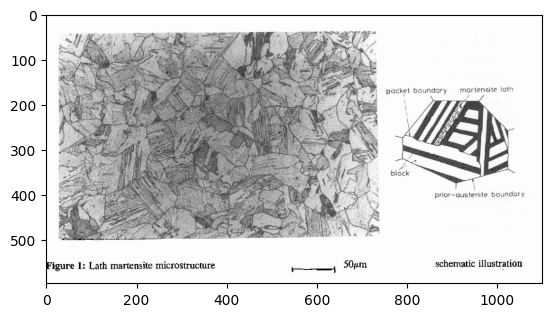

In [16]:
plt.imshow(image)

In [17]:
 # Convertir en niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Seuillage ou détection de bords
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Trouver les contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

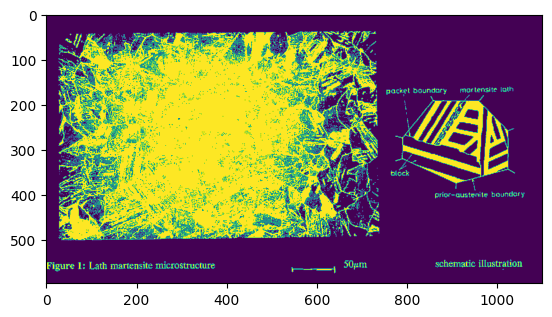

In [18]:
plt.imshow(thresh)

In [2]:
import cv2
import numpy as np

def crop_pattern(image_path, template_path, output_path, threshold=0.1):
    # Charger l'image et le template
    image = cv2.imread(image_path)
    template = cv2.imread(template_path, 0)
    if image is None or template is None:
        raise ValueError("L'une des images n'a pas pu être chargée. Vérifiez les chemins.")

    # Convertir l'image en niveaux de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Si le template est plus grand que l'image, redimensionner le template
    if template.shape[0] > gray_image.shape[0] or template.shape[1] > gray_image.shape[1]:
        scale_factor = min(gray_image.shape[0] / template.shape[0], gray_image.shape[1] / template.shape[1])
        new_size = (int(template.shape[1] * scale_factor), int(template.shape[0] * scale_factor))
        template = cv2.resize(template, new_size, interpolation=cv2.INTER_AREA)

    w, h = template.shape[::-1]

    # Méthodes de détection de template
    res = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= threshold)

    # S'assurer qu'au moins une correspondance a été trouvée
    if np.any(res >= threshold):
        pt = max(zip(*loc[::-1]), key=lambda x: res[x[::-1]])  # Trouver la correspondance la plus élevée
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

        # Rogner la zone de correspondance
        cropped = gray_image[pt[1]:pt[1]+h, pt[0]:pt[0]+w]
        # Enregistrer l'image rognée
        cv2.imwrite(output_path, cropped)
        print(f"Image rognée enregistrée dans : {output_path}")
    else:
        print("Aucune correspondance trouvée avec le seuil donné.")

In [8]:
# Chemin vers l'image source (à remplacer par le chemin réel sur votre système)
image_path = '/home/riccardo/Visual_Studio_Code/Grain-segmentation_prjt/dataset-full/martensite_cleaned_with_bbox_pred/converted_martensitemicrostructure190_crop_0.png'
# Chemin vers l'image qui sert de modèle (à remplacer par le chemin réel sur votre système)
template_path = '/home/riccardo/Visual_Studio_Code/Grain-segmentation_prjt/dataset-full/martensite_cleaned_with_bbox_pred/converted_C3_crop_0.png'  # Ce doit être un exemple de motif à rechercher
# Chemin où sauvegarder l'image rognée (à remplacer par le chemin réel sur votre système)
output_path = 'cropped_image.jpg'

# Appeler la fonction pour rogner le motif
crop_pattern(image_path, template_path, output_path, threshold=0.0001)

Aucune correspondance trouvée avec le seuil donné.
